<center>
    <h1>The Wizard of Oz</h1>
</center>

47717: Data mining<br>
Homework 3: Text Mining<br>
Razi Haj, 205739386<br>
Noa Levitzky, 205970783


In [2]:
%matplotlib nbagg
import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from stop_words import get_stop_words
from nltk.tokenize import PunktSentenceTokenizer

plt.style.use('fivethirtyeight')
FILE_PATH = 'theWoderfulWizardOfOz.txt'
porter = PorterStemmer()

with open(FILE_PATH, 'r') as file:
    tokens = nltk.word_tokenize(file.read())

In [12]:
def stem_sentence(t):
    stem_sentence = []
    for word in t:
        stem_sentence.append(porter.stem(word))
    return stem_sentence


def get_ordered_freq(t):
    frequency = {}

    for word in t:
        count = frequency.get(word, 0)
        frequency[word] = count + 1

    ordered = {k: v for k, v in reversed(sorted(
        frequency.items(), key=lambda item: item[1]))}

    return ordered


def select_x_highest(d, num):
    
    i = 0
    highest_dict = {}
    
    for k, v in d.items():
        if i < num:
            highest_dict[k] = v
            i += 1
        else:
            return highest_dict

# For POS tagging
def process_content(tokenized_text, chunk):
    processed = []
    try:
        for i in tokenized_text:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkParser = nltk.RegexpParser(chunk)
            chunked = chunkParser.parse(tagged)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                processed.append(subtree)

    except Exception as e:
        print(str(e))
    finally:
        return processed
    
def extract_phrases(nltk_chunked_txt):
    phrases = []
    for row in nltk_chunked_txt:
        row_lst = row.leaves()
        word_lst = []
        for word, t in row_lst:
            word_lst.append(word)
        phrases.append(" ".join(word_lst)) 
    return phrases


<h3>(b) Tokenizing the text:</h3>

<IPython.core.display.Javascript object>


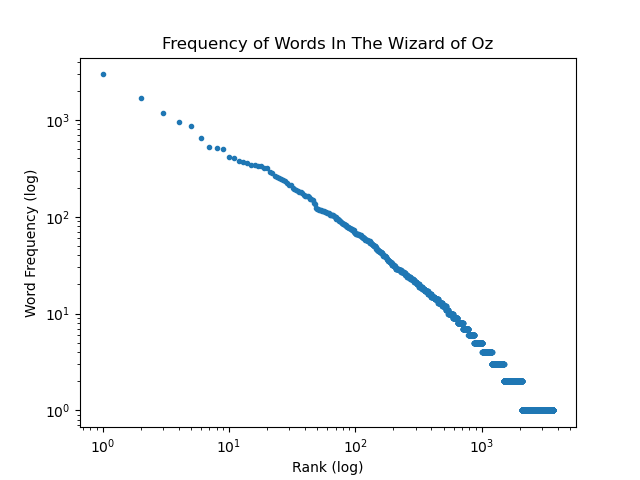

In [59]:
ordered_freq = get_ordered_freq(tokens)
freq_y = np.array(list(ordered_freq.values()))
rank_x = np.arange(1, len(ordered_freq)+1)
fig, axes = plt.subplots()
axes.loglog(rank_x, freq_y, marker=".", linestyle='None')

plt.title('Frequency of Words In The Wizard of Oz')
plt.ylabel('Word Frequency (log)')
plt.xlabel('Rank (log)')
plt.show()


In [38]:
res = select_x_highest(ordered_freq, 20)
print("Top 20 tokens are:", res)

Top 20 tokens are: {'the': 2948, 'and': 1688, 'to': 1182, 'of': 946, 'a': 857, 'I': 650, 'in': 525, 'was': 509, 'you': 503, 'he': 416, 'her': 403, 'that': 379, 'it': 370, 'Dorothy': 362, 'she': 344, 'they': 338, 'for': 336, 'said': 335, 'with': 319, 'as': 315}


<h3>(c) Removing stopwords:</h3>

<IPython.core.display.Javascript object>


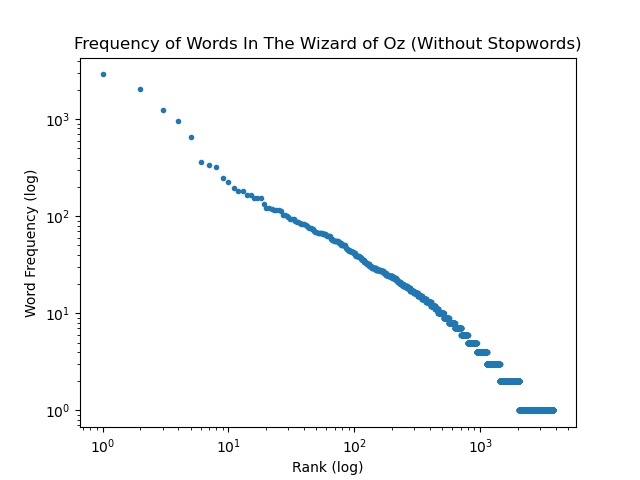

In [60]:
tokens_no_sw = \
    [w for w in tokens if w not in get_stop_words('english')]
orderedfreq_no_sw = get_ordered_freq(tokens_no_sw)
freq_y = np.array(list(ordered_freq_no_sw.values()))
rank_x = np.arange(1, len(ordered_freq_no_sw)+1)

fig, axes = plt.subplots()
plt.loglog(rank_x, freq_y, marker=".", linestyle='None')

plt.title('Frequency of Words In The Wizard of Oz (Without Stopwords)')
plt.ylabel('Word Frequency (log)')
plt.xlabel('Rank (log)')
plt.show()

In [7]:
res = select_x_highest(ordered_freq_no_sw, 20)
print("Top 20 tokens are:", res)

Top 20 tokens are: {',': 2883, '.': 2039, "''": 1253, '``': 961, 'I': 650, 'Dorothy': 362, 'said': 335, ';': 323, 'The': 245, 'Scarecrow': 224, '?': 194, 'Woodman': 182, 'Lion': 180, 'will': 164, 'Oz': 164, ']': 154, '[': 154, 'Illustration': 153, 'little': 135, 'one': 120}


<h3>(d) Stemming  & Removing stopwords:</h3>

<IPython.core.display.Javascript object>


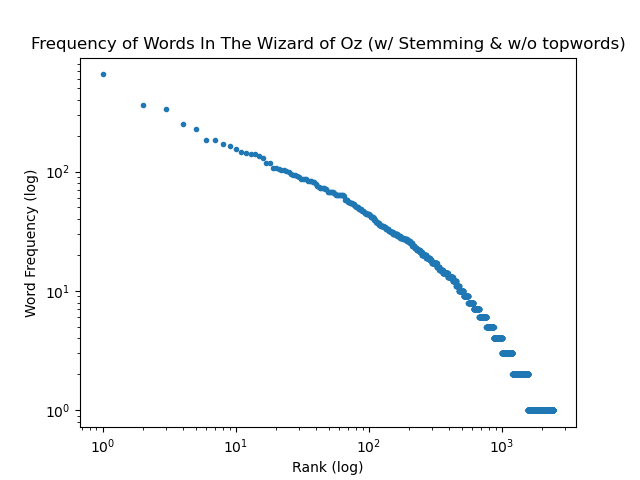

In [61]:
tokens_no_sw_stemmed = stem_sentence(tokens_no_sw)
ordered_freq_no_sw_stemmed = get_ordered_freq(tokens_no_sw_stemmed)
freq_y = np.array(list(ordered_freq_no_sw_stemmed.values()))
rank_x = np.arange(1, len(ordered_freq_no_sw_stemmed)+1)

fig, axes = plt.subplots()
plt.loglog(rank_x, freq_y, marker=".", linestyle='None')

plt.title('Frequency of Words In The Wizard of Oz (w/ Stemming & w/o stopwords)')
plt.ylabel('Word Frequency (log)')
plt.xlabel('Rank (log)')
plt.show()

In [24]:
res = select_x_highest(ordered_freq_no_sw, 20)
print("Top 20 tokens are:", res)

Top 20 tokens are: {',': 2883, '.': 2039, "''": 1253, '``': 961, 'I': 650, 'Dorothy': 362, 'said': 335, ';': 323, 'The': 245, 'Scarecrow': 224, '?': 194, 'Woodman': 182, 'Lion': 180, 'will': 164, 'Oz': 164, ']': 154, '[': 154, 'Illustration': 153, 'little': 135, 'one': 120}


<h3>(e) POS tagging:</h3>

<IPython.core.display.Javascript object>


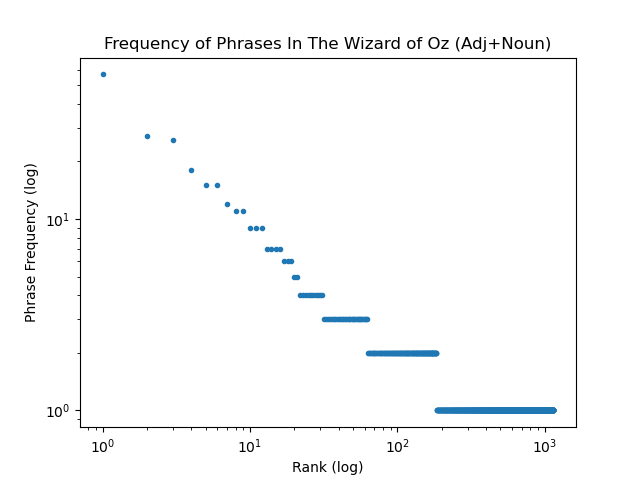

In [16]:
custom_sent_tokenizer = PunktSentenceTokenizer("GWBush.txt")
# JJ|JJR|JJS (one or more), and NN|NNS|NNP|NNPS (one or more)
chunkPattern = r"""Chunk: {<JJ.?>+<NN.?.?>+} """

with open(FILE_PATH, 'r') as file:
    tokenized = custom_sent_tokenizer.tokenize(file.read())

processed = process_content(tokenized, chunkPattern)
phrases = extract_phrases(processed)
phrases_freq = get_ordered_freq(phrases)

freq_y = np.array(list(phrases_freq.values()))
rank_x = np.arange(1, len(phrases_freq)+1)

fig, axes = plt.subplots()
plt.loglog(rank_x, freq_y, marker=".", linestyle='None')

plt.title('Frequency of Phrases In The Wizard of Oz (Adj+Noun)')
plt.ylabel('Phrase Frequency (log)')
plt.xlabel('Rank (log)')
plt.show()

In [15]:
res = select_x_highest(phrases_freq, 20)
print("Top 20 tokens are:", res)

Top 20 tokens are: {'[ Illustration ]': 57, 'little girl': 27, '[ Illustration': 26, 'yellow brick': 18, 'electronic works': 15, 'wicked Witch': 15, 'little man': 12, 'electronic work': 11, 'next morning': 11, 'green whiskers': 9, 'other side': 9, 'many years': 9, '[ Illustration ] [ Illustration': 7, 'great Oz': 7, 'little old woman': 7, 'little woman': 7, 'green girl': 6, 'great Wizard': 6, 'long journey': 6, 'old woman': 5}
